# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.142  1  0.260 0.611 0.001   
                             age        0.043  1  0.079 0.780 0.000   
                             Kiel       1.681  1  3.081 0.081 0.016   
                             Magdeburg  5.002  1  9.167 0.003 0.046   
                             Sweden     7.894  1 14.469 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.470  1  0.473 0.492 0.002   
                             age        1.447  1  1.455 0.229 0.008   
                             Kiel       0.057  1  0.057 0.811 0.000   
                             Magdeburg  2.836  1  2.852 0.093 0.015   
                             Sweden    14.184  1 14.266 0.000 0.069   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.214  0.742    False  
                             age               0.108  0.865    False  
                             Kiel              1.093  0.176    False  
                             Magdeburg         2.552  0.012     True  
                             Sweden            3.717  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.308  0.644    False  
                             age               0.640  0.383    False  
                             Kiel              0.091  0.886    False  
                             Magdeburg         1.032  0.196    False  
                             Sweden            3.674  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.109  1  7.867 0.006 0.040   
                             age        0.010  1  0.067 0.795 0.000   
                             Kiel       0.309  1  2.190 0.141 0.011   
                             Magdeburg  0.502  1  3.562 0.061 0.018   
                             Sweden     1.759  1 12.476 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.816  1  3.568 0.060 0.018   
                             age        0.563  1  1.105 0.294 0.006   
                             Kiel       2.300  1  4.519 0.035 0.023   
                             Magdeburg  2.236  1  4.394 0.037 0.022   
                             Sweden    29.538  1 58.037 0.000 0.233   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.255  0.016     True  
                             age               0.099  0.863    False  
                             Kiel              0.852  0.236    False  
                             Magdeburg         1.217  0.120    False  
                             Sweden            3.287  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.219  0.120    False  
                             age               0.531  0.422    False  
                             Kiel              1.458  0.076    False  
                             Magdeburg         1.427  0.080    False  
                             Sweden           11.934  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.255  0.016     True   
                             age       0.795         0.099  0.863    False   
                             Kiel      0.141         0.852  0.236    False   
                             Magdeburg 0.061         1.217  0.120    False   
                             Sweden    0.001         3.287  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.060         1.219  0.120    False   
                             age       0.294         0.531  0.422    False   
                             Kiel      0.035         1.458  0.076    False   
                             Magdeburg 0.037         1.427  0.080    False   
                             Sweden    0.000        11.934  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.611         0.214  0.742    False  
                             age       0.780         0.108  0.865    False  
                             Kiel      0.081         1.093  0.176    False  
                             Magdeburg 0.003         2.552  0.012     True  
                             Sweden    0.000         3.717  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.492         0.308  0.644    False  
                             age       0.229         0.640  0.383    False  
                             Kiel      0.811         0.091  0.886    False  
                             Magdeburg 0.093         1.032  0.196    False  
                             Sweden    0.000         3.674  0.001     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.222         3.367     0.275     0.260         2.488     0.336
std       0.293         6.459     0.320     0.302         5.327     0.330
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.414     0.002     0.004         0.337     0.015
50%       0.057         1.242     0.114     0.119         0.925     0.238
75%       0.386         3.369     0.514     0.460         2.430     0.614
max       1.000        87.019     1.000     1.000       148.908     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.255   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.444   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.296         0.528   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.257         0.590   
A0A075B6H7                                         AD     0.003         2.505   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.265         0.577   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.699         0.155   
S4R3U6                                             AD     0.060         1.219   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True   
A0A024R0T9;K7ER74;P02655                           AD      0.078    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.423    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.380    False   
A0A075B6H7                                         AD      0.010     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.388    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.788    False   
S4R3U6                                             AD      0.120    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.611         0.214   
A0A024R0T9;K7ER74;P02655                           AD     0.062         1.208   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.070         1.155   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.717         0.144   
A0A075B6H7                                         AD     0.058         1.239   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.005         2.282   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.255         0.594   
S4R3U6                                             AD     0.492         0.308   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.742    False  
A0A024R0T9;K7ER74;P02655                           AD      0.144    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.157    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.819    False  
A0A075B6H7                                         AD      0.135    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.235         1.627     0.294     0.255         1.411     0.337
std       0.293         1.890     0.315     0.292         1.641     0.318
min       0.000         0.001     0.000     0.000         0.002     0.000
25%       0.007         0.385     0.018     0.011         0.350     0.036
50%       0.079         1.102     0.149     0.123         0.910     0.244
75%       0.412         2.186     0.540     0.447         1.954     0.603
max       0.998        22.848     0.999     0.996        21.501     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,924,1020


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.255  0.016   
A0A024R0T9;K7ER74;P02655                           0.036         1.444  0.078   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.296         0.528  0.423   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.257         0.590  0.380   
A0A075B6H7                                         0.003         2.505  0.010   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.265         0.577  0.388   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.699         0.155  0.788   
S4R3U6                                             0.060         1.219  0.120   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.611   
A0A024R0T9;K7ER74;P02655                              False 0.062   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.070   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.717   
A0A075B6H7                                             True 0.058   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.005   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.255   
S4R3U6                                                False 0.492   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.214  0.742   
A0A024R0T9;K7ER74;P02655                                   1.208  0.144   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.155  0.157   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.144  0.819   
A0A075B6H7                                                 1.239  0.135   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     2.282  0.020   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.594  0.413   
S4R3U6                                                     0.308  0.644   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    866
DAE (yes) - PI (yes)   343
DAE (yes) - PI (no)    154
DAE (no)  - PI (yes)    58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.255  0.016     True 0.611   
A0A075B6H7                   0.003         2.505  0.010     True 0.058   
A0A075B6I0                   0.001         3.183  0.002     True 0.031   
A0A075B6J9                   0.020         1.709  0.046     True 0.030   
A0A075B6Q5                   0.007         2.167  0.019     True 0.292   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.813         0.090  0.876    False 0.012   
Q9UP79                       0.000         4.565  0.000     True 0.481   
Q9UQ52                       0.001         3.230  0.002     True 0.035   
Q9Y6C2                       0.006         2.229  0.017     True 0.846   
Q9Y6X5                       0.265         0.577  0.388    False 0.005   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.214  0.742    False       186  
A0A075B6H7                           1.239  0.135    False        91  
A0A075B6I0                           1.512  0.082    False       194  
A0A075B6J9                           1.528  0.080    False       156  
A0A075B6Q5                           0.534  0.454    False       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               1.914  0.039     True       171  
Q9UP79                               0.317  0.633    False       135  
Q9UQ52                               1.460  0.091    False       188  
Q9Y6C2                               0.073  0.909    False       119  
Q9Y6X5                               2.282  0.020     True       173  

[212 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.016,0.742,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.078,0.144,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.423,0.157,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.380,0.819,196,DAE (no) - PI (no)
A0A075B6H7,0.010,0.135,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.388,0.020,173,DAE (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
F5GWE5;I3L2X8;I3L3W1;I3L459;I3L471;I3L4C0;I3L4H1;I3L4U7;Q00169,0.007,0.975,78,DAE (yes) - PI (no),0.968
A6NCT7;Q07092;Q07092-2,0.005,0.935,147,DAE (yes) - PI (no),0.930
Q9NPH3;Q9NPH3-2;Q9NPH3-5,0.023,0.948,186,DAE (yes) - PI (no),0.925
A0A087X117;A0A0G2JN29;J3KN36;P69849;Q15155;Q5JPE7;Q5JPE7-2,0.009,0.922,121,DAE (yes) - PI (no),0.914
P22692;P22692-2,0.031,0.945,170,DAE (yes) - PI (no),0.914
...,...,...,...,...,...
Q9NX62,0.044,0.055,197,DAE (yes) - PI (no),0.011
P00740;P00740-2,0.042,0.052,197,DAE (yes) - PI (no),0.010
K7ERG9;P00746,0.041,0.051,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


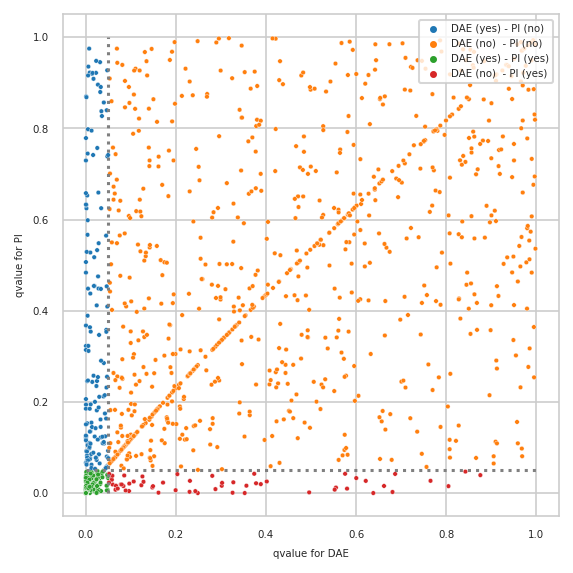

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


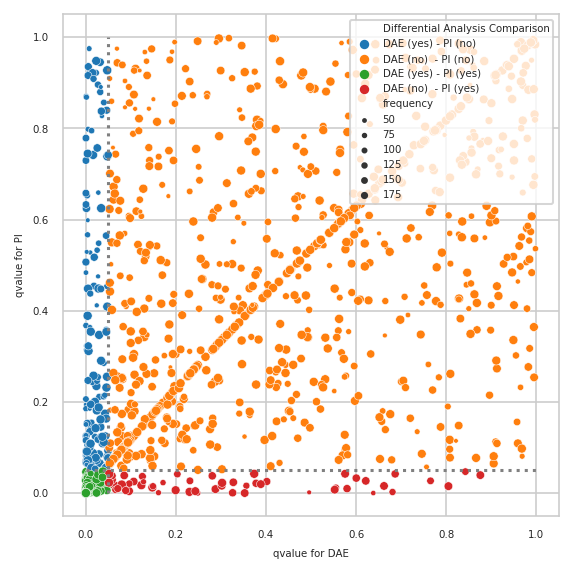

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out